In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('Keylogger_Detection.csv')
df.head(5)

/var/folders/fr/jvr3m22d48lfs2t3ll1blyjw0000gn/T/ipykernel_2138/1295914313.py:1: DtypeWarning: Columns (48,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Keylogger_Detection.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [14]:
from sklearn.preprocessing import LabelEncoder

df[' Destination IP'] = LabelEncoder().fit_transform(df[' Destination IP'])
df[' Source IP'] = LabelEncoder().fit_transform(df[' Destination IP'])
df['Class'] = LabelEncoder().fit_transform(df['Class'])

df = df.select_dtypes(include=[np.number])
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.dropna()
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,2307,34451.0,2307,443.0,6.0,12140931.0,9.0,6.0,334.0,3664.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,929,53892.0,929,443.0,6.0,418882.0,102.0,203.0,829.0,279509.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10,443.0,10,50750.0,6.0,45.0,2.0,0.0,55.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,23025.0,9,53.0,17.0,541699.0,1.0,1.0,39.0,225.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,393,52602.0,393,443.0,6.0,7310795.0,3.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
feature_names = df.columns

target = ['Class']
features = [c for c in df.columns if c != "Class"]
# Fit the scaler to the data and transform the data
df[features] = scaler.fit_transform(df[features])

df.head(10)

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,1.525004,-0.210447,1.525004,-0.368579,-0.468869,0.042412,-0.004811,-0.036722,-0.013233,-0.038629,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
1,0.017335,0.828488,0.017335,-0.368579,-0.468869,-0.465677,0.945481,0.575336,-0.004001,0.556643,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
2,-0.988143,-2.027850,-0.988143,2.839491,-0.468869,-0.483832,-0.076338,-0.055364,-0.018437,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
3,-0.989237,-0.821058,-0.989237,-0.393449,2.036974,-0.460354,-0.086556,-0.052257,-0.018736,-0.046050,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
4,-0.569102,0.759550,-0.569102,-0.368579,-0.468869,-0.166949,-0.066120,-0.055364,-0.019463,-0.046536,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
5,0.126745,1.027981,0.126745,-0.368579,-0.468869,-0.483499,-0.076338,-0.055364,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
6,-0.987049,-2.027850,-0.987049,2.019602,-0.468869,-0.483735,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,1
7,-0.037370,0.318132,-0.037370,-0.368579,-0.468869,2.063657,-0.045683,-0.036722,0.008440,-0.043994,...,0.004137,-0.054223,-0.063066,-0.066458,-0.036581,3.583540,-0.121636,3.366029,3.703867,1
8,1.302902,0.486095,1.302902,-0.368579,-0.468869,0.324113,-0.035465,-0.042936,-0.008869,-0.046208,...,0.004135,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0
9,1.407936,0.837520,1.407936,-0.368579,-0.468869,-0.481683,-0.086556,-0.052257,-0.019463,-0.046536,...,0.004137,-0.183877,-0.063066,-0.175005,-0.173854,-0.290551,-0.121636,-0.296481,-0.277622,0


## Visualizations

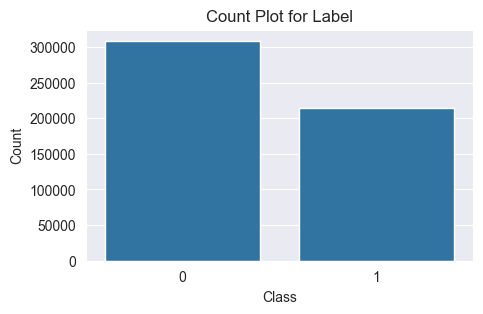

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count Plot for Label')
plt.show()

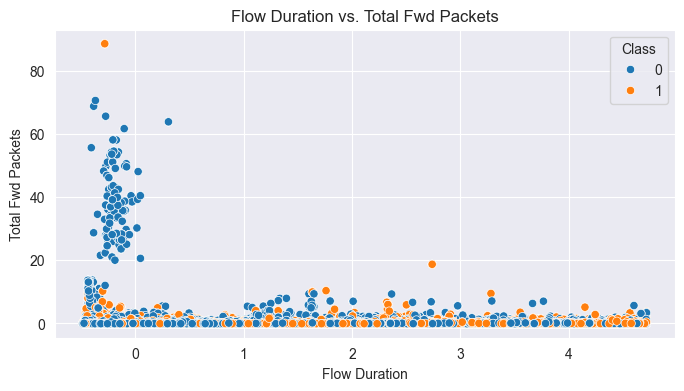

In [17]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=' Flow Duration', y=' Total Fwd Packets', hue='Class', data=df)
plt.title('Flow Duration vs. Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()

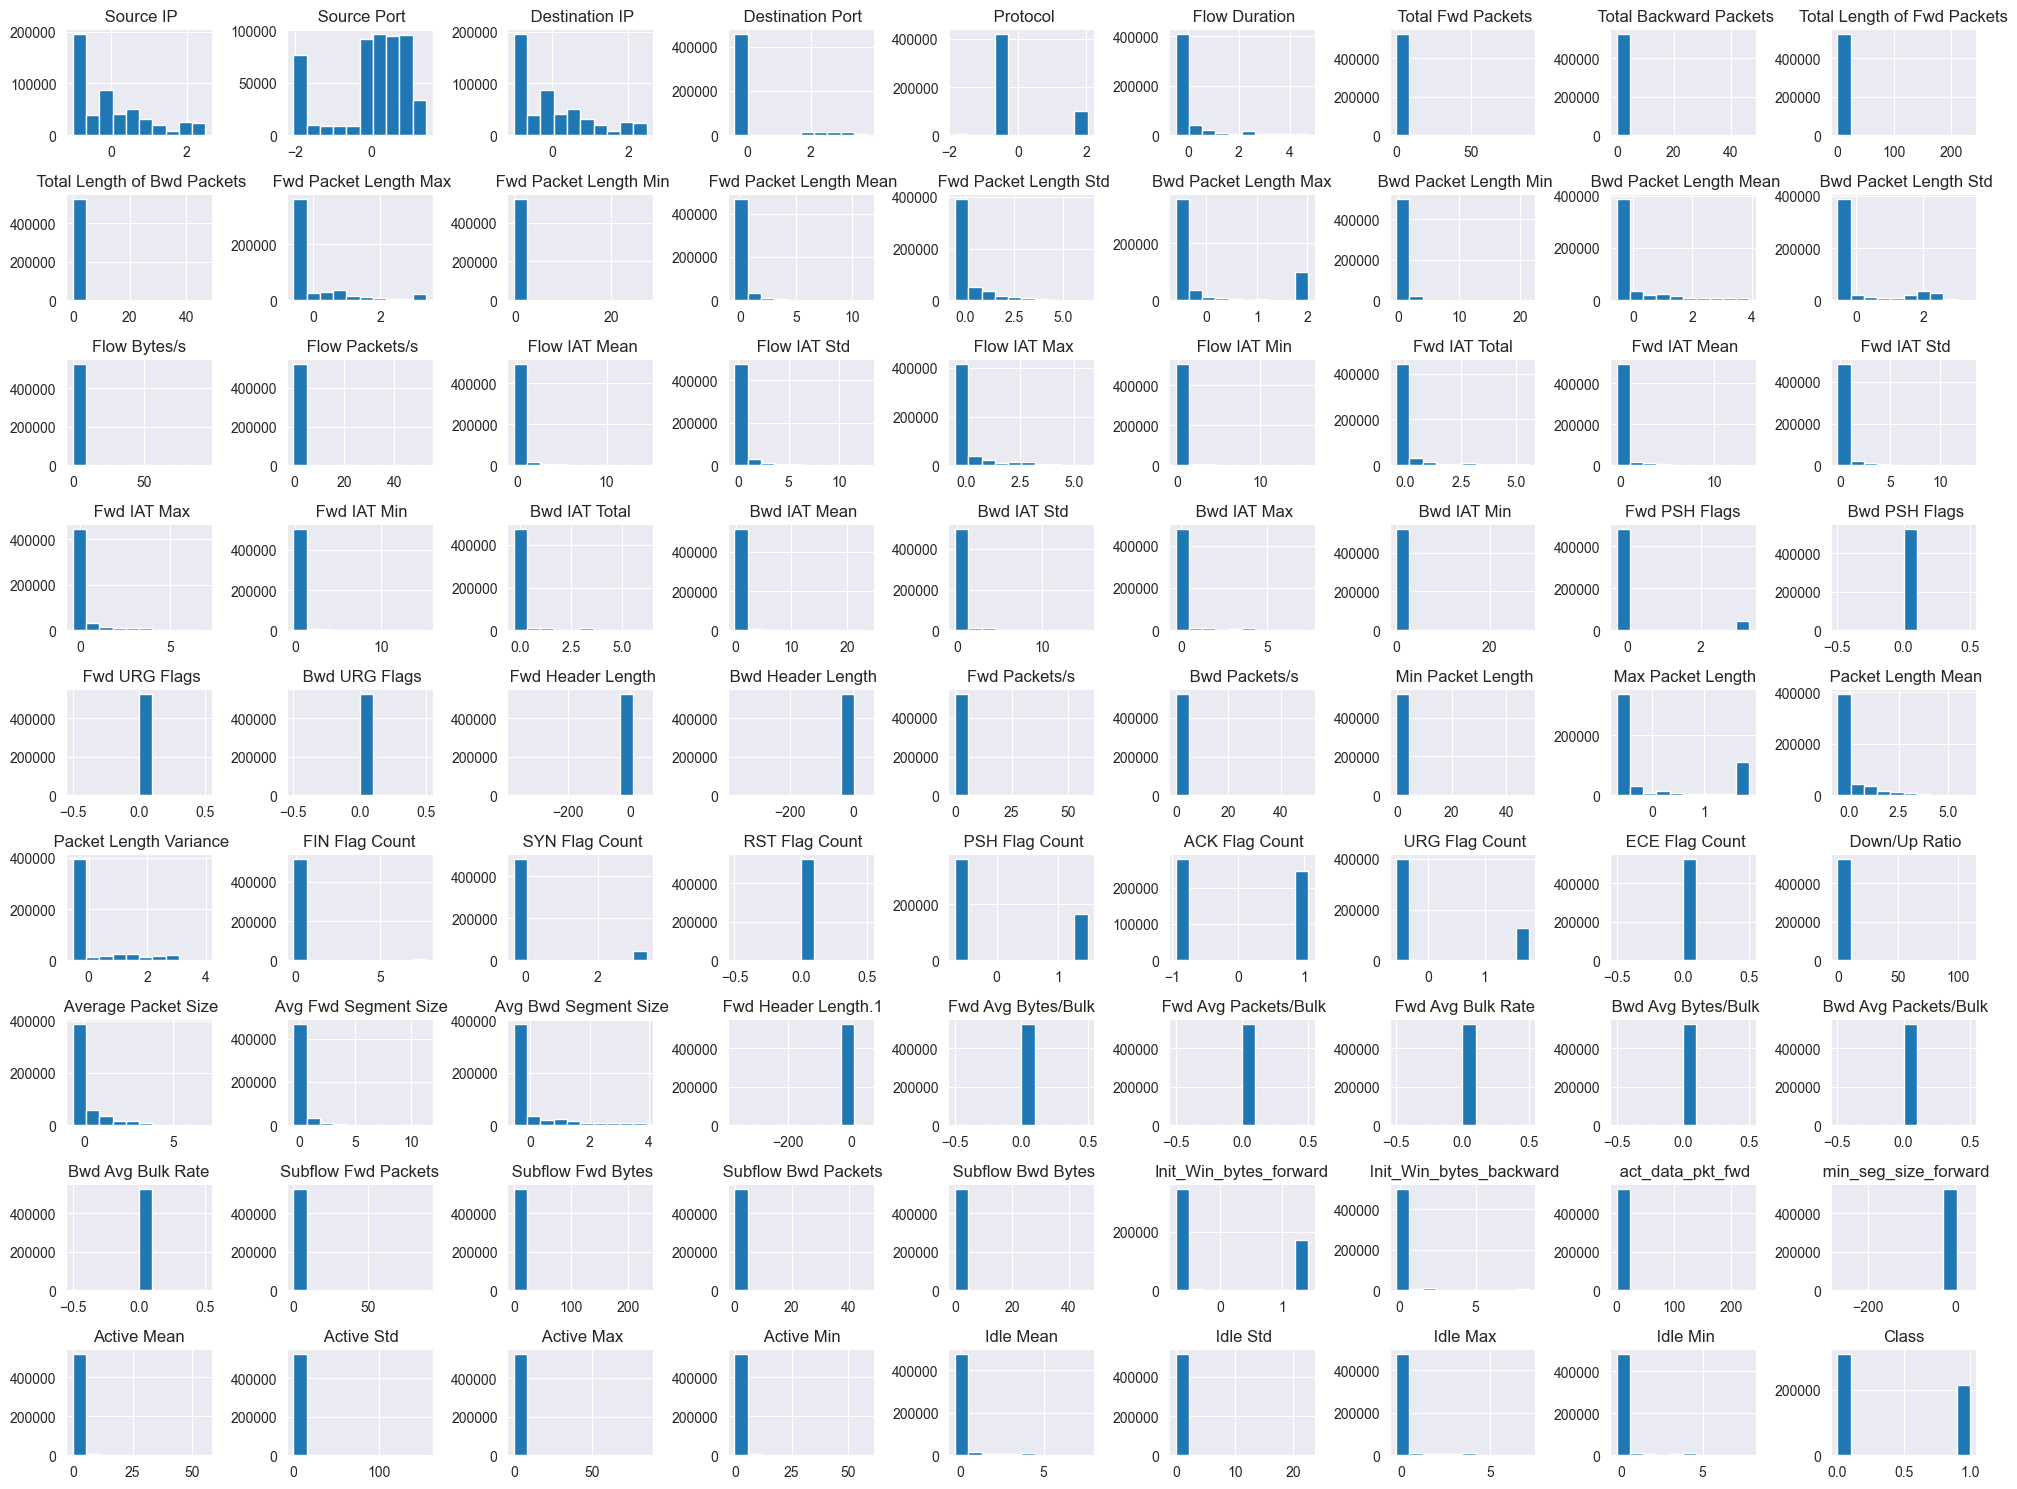

In [18]:
df.hist(figsize=(20, 15))  # Adjust the fig size as needed
plt.tight_layout()
plt.savefig('dist.png')  # To avoid overlap of subplots
plt.show()

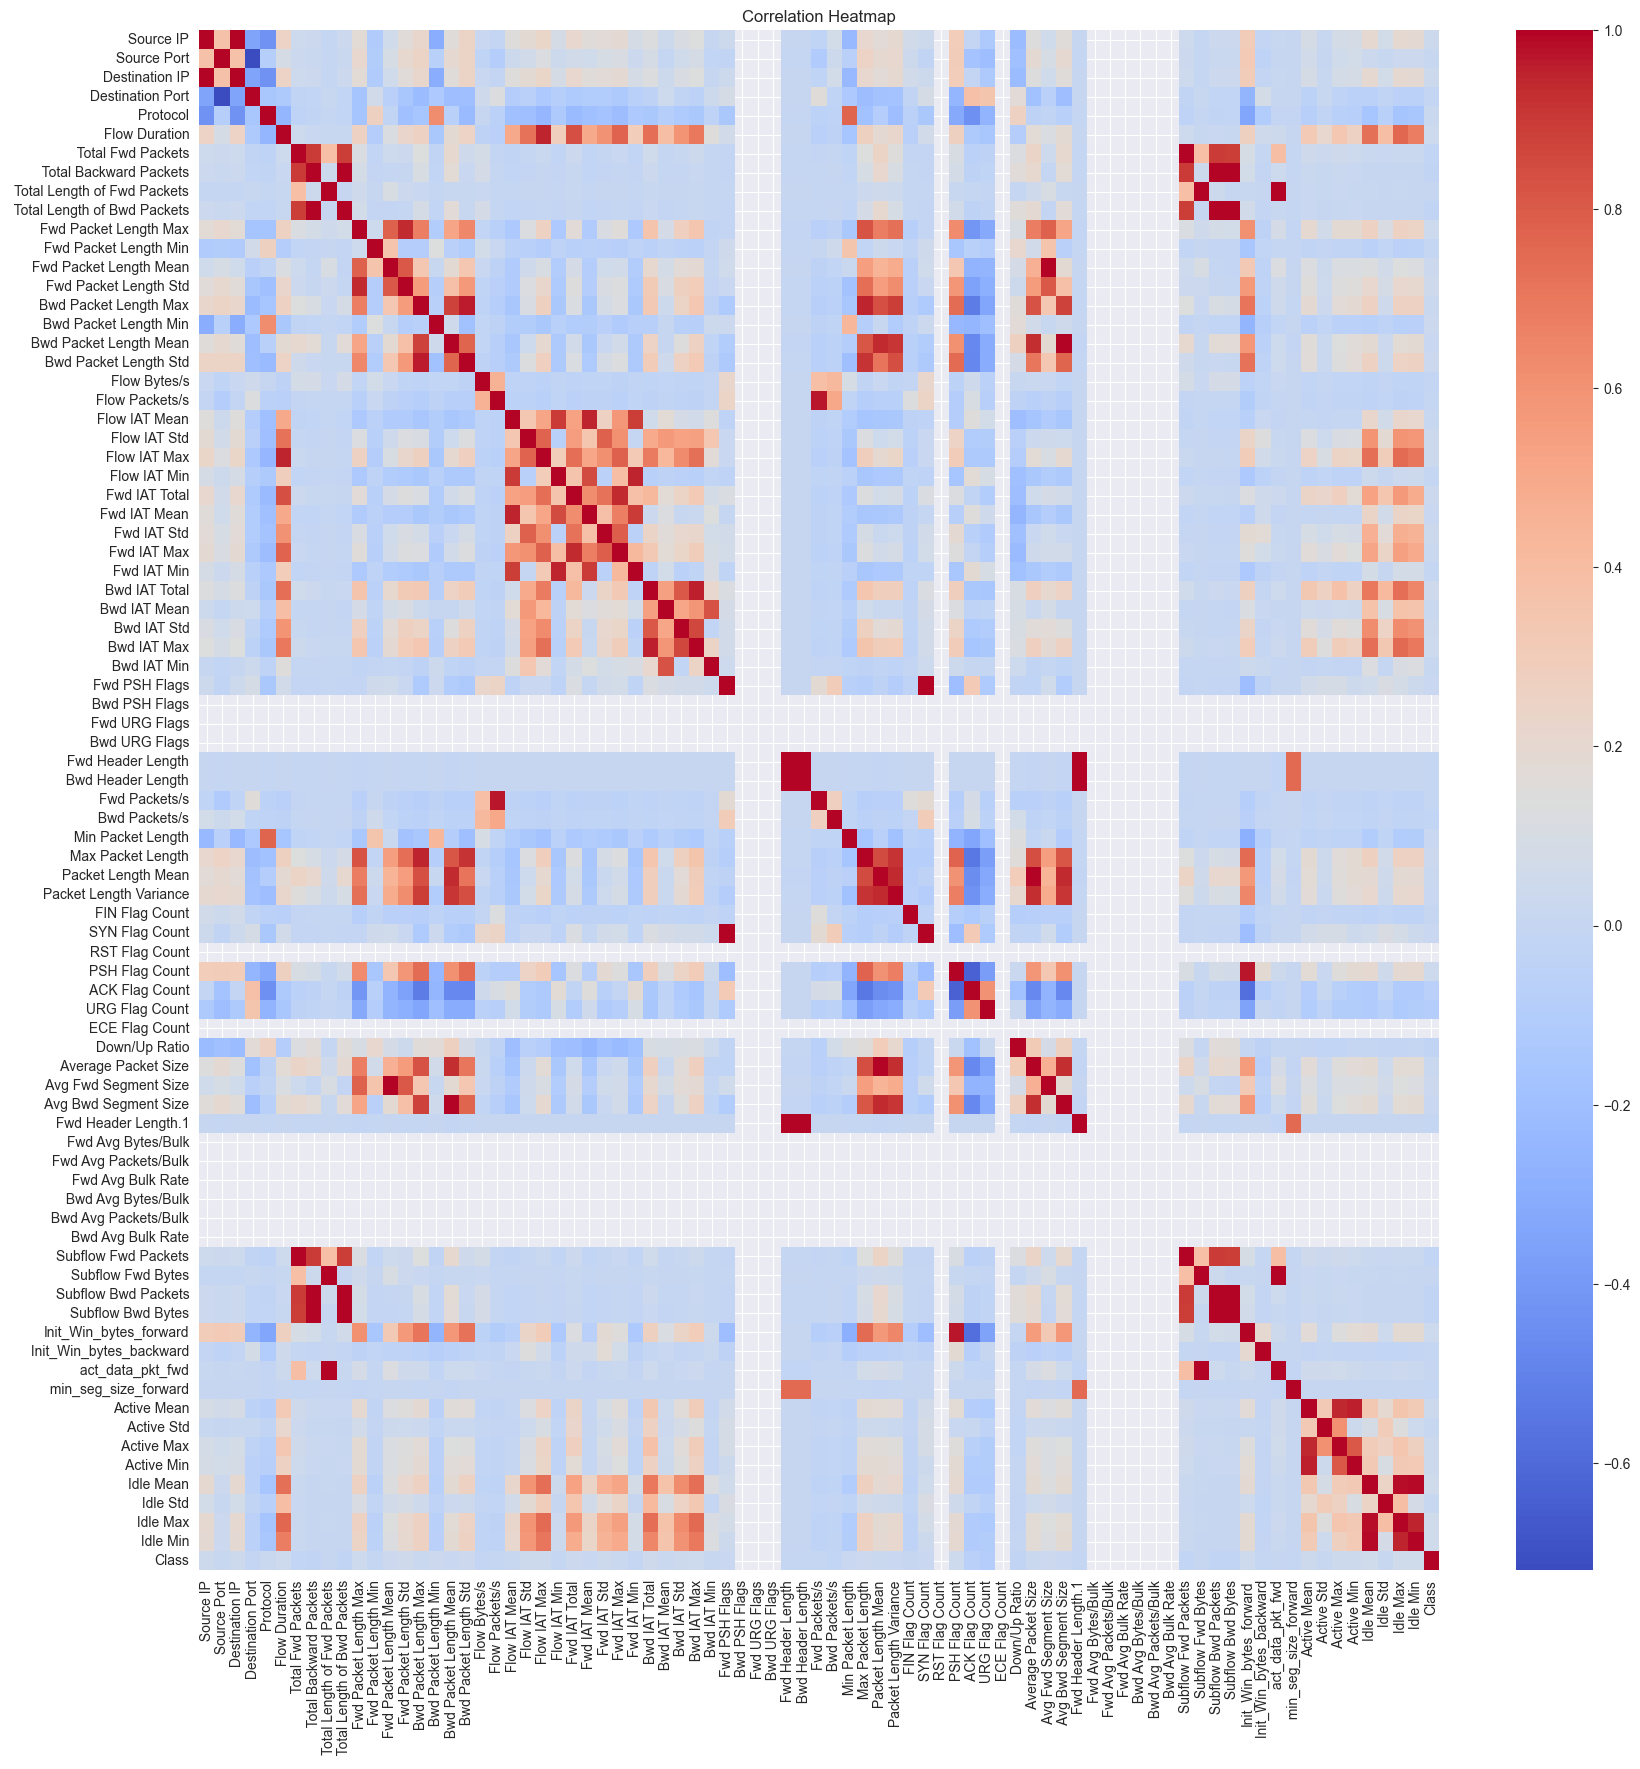

In [19]:

corr = df[df.columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('corr.png', dpi=900)  # Save the plot with 300 dpi

plt.show()

In [20]:
features = [c for c in df.columns if c != "Class"]

# Assuming 'data' is your DataFrame containing the features
correlation_matrix = df[features].corr().abs()

# Create a mask to ignore diagonal and lower triangular values
mask = (correlation_matrix
        .where(np.triu(np.ones(correlation_matrix.shape), k=1)
               .astype(bool)))

# Find features with correlation greater than a threshold (e.g., 0.7)
high_corr_features = [column for column in mask.columns if any(mask[column] > 0.7)]

# Drop the highly correlated features
df = df.drop(high_corr_features, axis=1)


In [21]:
features = [c for c in df.columns if c != "Class"]

df.head()

,Source IP,Source Port,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,...,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Class
0,1.525004,-0.210447,-0.468869,0.042412,-0.004811,-0.013233,-0.021233,-0.212204,1.992624,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.205157,-0.183877,-0.063066,-0.121636,0
1,0.017335,0.828488,-0.468869,-0.465677,0.945481,-0.004001,0.815443,-0.212204,1.938670,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.197717,-0.183877,-0.063066,-0.121636,0
2,-0.988143,-2.027850,-0.468869,-0.483832,-0.076338,-0.018437,-0.435510,-0.212204,-0.611579,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
3,-0.989237,-0.821058,2.036974,-0.460354,-0.086556,-0.018736,-0.478833,0.522900,-0.206920,2.999047,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0
4,-0.569102,0.759550,-0.468869,-0.166949,-0.066120,-0.019463,-0.584433,-0.212204,-0.611579,-0.356089,...,0.0,0.0,0.0,0.0,0.0,-0.221101,-0.183877,-0.063066,-0.121636,0


# Evaluation Report Funtion

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,classification_report


def evaluate_classification(y_true, y_predict, model_name):
    # Calculate metrics
    accuracy_scr = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)

    # Create a classification report
    report = classification_report(y_true, y_predict, output_dict=True)

    # Create a bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    values = [accuracy_scr, precision, recall, f1]

    colors = sns.color_palette("pastel")

    plt.figure(figsize=(5, 4))
    bars = plt.bar(metrics, values, color=colors)
    plt.ylabel('Score')
    plt.title('Performance Metrics ' + model_name)
    plt.ylim(0, 1)  # Set the y-axis limits

    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, value / 1.1, str(round(value, 2)), ha='center', va='center',
                 color='black')
    plt.savefig(model_name + str(time) + '.png')

    plt.show()
    print("Accuracy:", accuracy_scr)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n\nClassification Report:\n", report)
    # Return metrics and report
    return {
        'accuracy': accuracy_scr,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': report
    }

# Usage example
# Assuming y_test and y_pred are your actual and predicted labels


## Split

In [23]:
X = df[features].values
y = df[target].values  # Target

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418876, 36), (104719, 36), (418876, 1), (104719, 1))

# XG BOOST

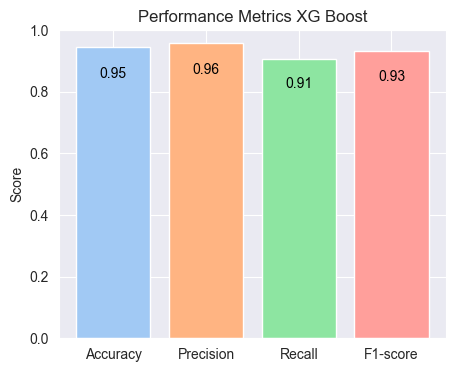

Accuracy: 0.9454349258491773
Precision: 0.9575282000980873
Recall: 0.9074599116895189
F1-score: 0.9318219782842143


Classification Report:
 {'0': {'precision': 0.9377218911775286, 'recall': 0.9719236816936568, 'f1-score': 0.9545165090584902, 'support': 61689.0}, '1': {'precision': 0.9575282000980873, 'recall': 0.9074599116895189, 'f1-score': 0.9318219782842143, 'support': 43030.0}, 'accuracy': 0.9454349258491773, 'macro avg': {'precision': 0.9476250456378079, 'recall': 0.9396917966915879, 'f1-score': 0.9431692436713522, 'support': 104719.0}, 'weighted avg': {'precision': 0.9458604856336602, 'recall': 0.9454349258491773, 'f1-score': 0.9451911176852238, 'support': 104719.0}}


Training Time: 5.137079954147339 seconds


In [31]:
import xgboost as xgb
import time

# Convert datasets to DMatrix format for XGBoost
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 20,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Train the model
start_time = time.time()

num_rounds = 100
xgb_model = xgb.train(params, d_train, num_rounds)

end_time = time.time()

training_time = end_time - start_time
# Make predictions
y_pred_proba = xgb_model.predict(d_test)
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

evaluate_classification(y_test, y_pred, 'XG Boost')

print(f"\n\nTraining Time: {training_time} seconds")

# Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Time: 0.937546968460083 seconds


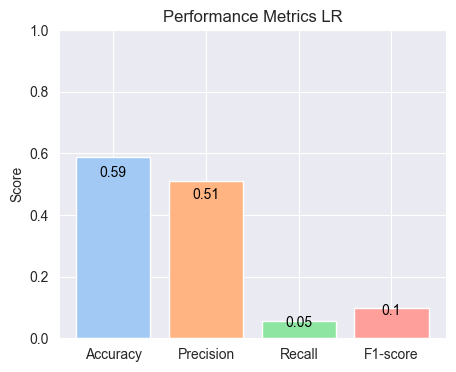

Accuracy: 0.5901698832112606
Precision: 0.5122586244304621
Recall: 0.05486869625842435
F1-score: 0.09912046852368857


Classification Report:
 {'0': {'precision': 0.5937568674458096, 'recall': 0.9635591434453468, 'f1-score': 0.734751141848837, 'support': 61689.0}, '1': {'precision': 0.5122586244304621, 'recall': 0.05486869625842435, 'f1-score': 0.09912046852368857, 'support': 43030.0}, 'accuracy': 0.5901698832112606, 'macro avg': {'precision': 0.5530077459381358, 'recall': 0.5092139198518856, 'f1-score': 0.41693580518626283, 'support': 104719.0}, 'weighted avg': {'precision': 0.560268490007614, 'recall': 0.5901698832112606, 'f1-score': 0.47356465350210786, 'support': 104719.0}}


{'accuracy': 0.5901698832112606,
 'precision': 0.5122586244304621,
 'recall': 0.05486869625842435,
 'f1': 0.09912046852368857,
 'classification_report': {'0': {'precision': 0.5937568674458096,
   'recall': 0.9635591434453468,
   'f1-score': 0.734751141848837,
   'support': 61689.0},
  '1': {'precision': 0.5122586244304621,
   'recall': 0.05486869625842435,
   'f1-score': 0.09912046852368857,
   'support': 43030.0},
  'accuracy': 0.5901698832112606,
  'macro avg': {'precision': 0.5530077459381358,
   'recall': 0.5092139198518856,
   'f1-score': 0.41693580518626283,
   'support': 104719.0},
  'weighted avg': {'precision': 0.560268490007614,
   'recall': 0.5901698832112606,
   'f1-score': 0.47356465350210786,
   'support': 104719.0}}}

In [32]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_reg = LogisticRegression(max_iter=10000)

start_time = time.time()

# Train the model on the training data
logistic_reg.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Predict on the testing data
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
evaluate_classification(y_test, y_pred, 'LR')




# Random Forest



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Time: 83.82353091239929 seconds


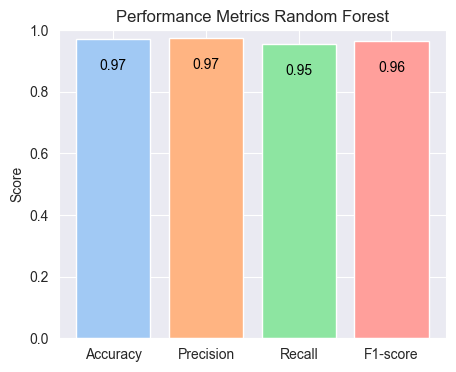

Accuracy: 0.9711227188953294
Precision: 0.9747021690635531
Recall: 0.9544968626539624
F1-score: 0.9644937065564532


Classification Report:
 {'0': {'precision': 0.9687125485370959, 'recall': 0.9827197717583361, 'f1-score': 0.9756658887905366, 'support': 61689.0}, '1': {'precision': 0.9747021690635531, 'recall': 0.9544968626539624, 'f1-score': 0.9644937065564532, 'support': 43030.0}, 'accuracy': 0.9711227188953294, 'macro avg': {'precision': 0.9717073588003244, 'recall': 0.9686083172061493, 'f1-score': 0.970079797673495, 'support': 104719.0}, 'weighted avg': {'precision': 0.9711737386864809, 'recall': 0.9711227188953294, 'f1-score': 0.9710751363813979, 'support': 104719.0}}


{'accuracy': 0.9711227188953294,
 'precision': 0.9747021690635531,
 'recall': 0.9544968626539624,
 'f1': 0.9644937065564532,
 'classification_report': {'0': {'precision': 0.9687125485370959,
   'recall': 0.9827197717583361,
   'f1-score': 0.9756658887905366,
   'support': 61689.0},
  '1': {'precision': 0.9747021690635531,
   'recall': 0.9544968626539624,
   'f1-score': 0.9644937065564532,
   'support': 43030.0},
  'accuracy': 0.9711227188953294,
  'macro avg': {'precision': 0.9717073588003244,
   'recall': 0.9686083172061493,
   'f1-score': 0.970079797673495,
   'support': 104719.0},
  'weighted avg': {'precision': 0.9711737386864809,
   'recall': 0.9711227188953294,
   'f1-score': 0.9710751363813979,
   'support': 104719.0}}}

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier(n_estimators=150)
start_time = time.time()

# Train the model on the training data
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# Predict on the testing data
y_pred = random_forest.predict(X_test)

evaluate_classification(y_test, y_pred, 'Random Forest')

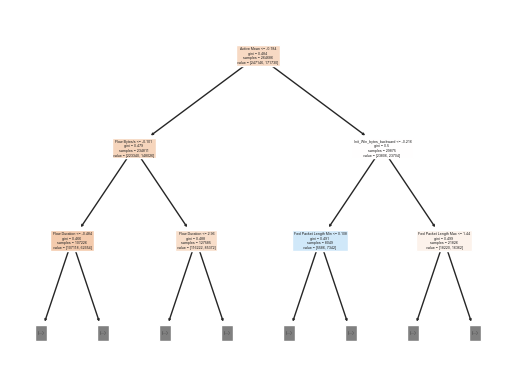

In [34]:
from sklearn.tree import plot_tree

plot_tree(random_forest.estimators_[0], filled=True, feature_names=df[features].columns, max_depth=2)
plt.savefig('tree_plot.png', dpi=900)  # Save the plot with 300 dpi

plt.show()

# Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras import optimizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Loss: {loss}, Accuracy: {accuracy}")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
predicted_classes = np.argmax(y_pred, axis=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

evaluate_classification(y_test, y_pred, 'NN')


Epoch 1/30
13090/13090 [==============================] - 8s 558us/step - loss: 0.6567 - accuracy: 0.6155 - val_loss: 0.6462 - val_accuracy: 0.6232
Epoch 2/30
13090/13090 [==============================] - 7s 542us/step - loss: 0.6435 - accuracy: 0.6247 - val_loss: 0.6351 - val_accuracy: 0.6281
Epoch 3/30
13090/13090 [==============================] - 7s 557us/step - loss: 0.6376 - accuracy: 0.6279 - val_loss: 0.6311 - val_accuracy: 0.6338
Epoch 4/30
13090/13090 [==============================] - 7s 532us/step - loss: 0.6335 - accuracy: 0.6313 - val_loss: 0.6275 - val_accuracy: 0.6363
Epoch 5/30
13090/13090 [==============================] - 7s 541us/step - loss: 0.6309 - accuracy: 0.6335 - val_loss: 0.6242 - val_accuracy: 0.6384
Epoch 6/30
13090/13090 [==============================] - 7s 550us/step - loss: 0.6292 - accuracy: 0.6347 - val_loss: 0.6218 - val_accuracy: 0.6418
Epoch 7/30
13090/13090 [==============================] - 7s 570us/step - loss: 0.6272 - accuracy: 0.6364 - val_

KeyboardInterrupt: 

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Build the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Specify the desired sample size
desired_sample_size = 100000

# Reduce the sample size while maintaining the label ratio
df_sampled = df.groupby(target, group_keys=False).apply(lambda x: x.sample(min(len(x), desired_sample_size)))

X = df_sampled[features].values
y = df_sampled[target].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# Build the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

In [ ]:
metrics = ['NN', 'LR', 'XG', 'RF']
values = [0.59, 0.59, 0.95, 0.97]

colors = sns.color_palette("pastel")

plt.figure(figsize=(5, 4))
bars = plt.bar(metrics, values, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.5, 1)  # Set the y-axis limits

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value / 1.1, str(round(value, 2)), ha='center', va='center',
             color='black')
plt.savefig('x.png')

plt.show()


In [ ]:
selected_columns = ['Init_Win_bytes_forward',
                    ' Init_Win_bytes_backward',
                    ' act_data_pkt_fwd',
                    ' min_seg_size_forward', 'Class']
corr = df[selected_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()